In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits import mplot3d
import imageio
from mpl_toolkits.mplot3d import Axes3D
import random
from scipy.spatial import ConvexHull

In [ ]:
def print_a_circle(file_lines, start_row, end_row, r, lifetime):    
    u = np.linspace(0, 2 * np.pi, 100)
    v = np.linspace(0, np.pi, 100)
    for i in range (start_row, end_row):
        x_centre = file_lines[i][0]        
        y_centre = file_lines[i][1]        
        z_centre = file_lines[i][2]
        age = file_lines[i][3]
        if (x_centre == 0 and y_centre == 0 and z_centre ==0):
            continue
        current_rad = (r/4)*(1+age/lifetime)
        x = current_rad * np.outer(np.cos(u), np.sin(v)) + x_centre
        y = current_rad * np.outer(np.sin(u), np.sin(v)) + y_centre
        z = current_rad * np.outer(np.ones(np.size(u)), np.cos(v)) + z_centre
        if file_lines[i][3] == file_lines[i+(end_row-start_row)][3]:

            ax.plot_surface(x, y, z,  rstride=4, cstride=4, color="r", linewidth=0, alpha=0.3)
        else:
            ax.plot_surface(x, y, z,  rstride=4, cstride=4, color="b", linewidth=0, alpha=0.3)


In [ ]:
def find_the_max_and_min_coordinates(file_lines):
    x_max = (np.array(file_lines).max(axis=0))[0]
    y_max = (np.array(file_lines).max(axis=0))[1]
    z_max = (np.array(file_lines).max(axis=0))[2]
    x_min = (np.array(file_lines).min(axis=0))[0]
    y_min = (np.array(file_lines).min(axis=0))[1]
    z_min = (np.array(file_lines).min(axis=0))[2]
    return x_max, y_max, z_max, x_min, y_min, z_min

In [ ]:
file_lines = []
with open ("3doutput.txt") as my_file:
    for line in my_file:
        line = line.strip()
        temp = line.split(",")
        file_lines.append([float(temp[0]), float(temp[1]), float(temp[2]), float(temp[3])])      
x_max, y_max, z_max, x_min, y_min, z_min = find_the_max_and_min_coordinates(file_lines)

IndexError: list index out of range

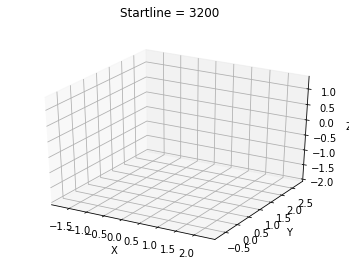

In [19]:
max_line = (len(file_lines))
start_line = 0
#while start_line < 10:
while start_line < max_line - 49:
    fig = plt.figure()
 
    fig.suptitle('Startline = {}'.format(start_line), fontsize=12)
    ax = fig.add_subplot(111, projection='3d')
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")
    ax = plt.gca()
    ax.set_xlim3d((x_min, x_max))
    ax.set_ylim3d((y_min, y_max))
    ax.set_zlim3d((z_min, z_max))

    print_a_circle(file_lines, start_line, start_line+50, 0.25, 8)
    plt.savefig("Startline = {}".format(start_line))
    plt.close()

    
    start_line += 50


In [20]:

filenames= ["Startline = {}.png".format(50*x) for x in range(64)]

images = []
for filename in filenames:
    images.append(imageio.imread(filename))
imageio.mimsave('output_1234.gif', images, fps=5)

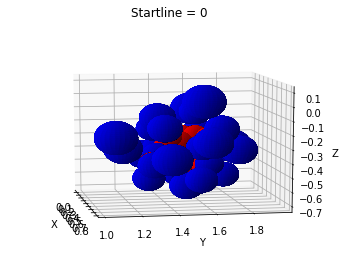

In [40]:
max_line = (len(file_lines))
start_line = 0
#while start_line < 10:
fig = plt.figure()
fig.suptitle('Startline = {}'.format(start_line), fontsize=12)
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
# ax = plt.gca()
# ax.set_xlim3d((-1, 1))
# ax.set_ylim3d((-1, 1))
# ax.set_zlim3d((-1, 1))
for ii in range(0,360,10):
    ax.view_init(elev=10., azim=ii)
    print_a_circle(file_lines, max_line-100, max_line-50, 0.25, 8)
    plt.savefig("azim = {}".format(ii))

In [41]:
filenames= ["azim = {}.png".format(10*x) for x in range(36)]

images = []
for filename in filenames:
    images.append(imageio.imread(filename))
imageio.mimsave('final_cluster.gif', images, fps=5)